# Lab 6
Eric Miao, Sabrina Peng, Fernando Vazquez

CS7324, Fall 2020

## 1. Business Understanding

### 1.1. Dataset Introduction
Casting is a manufacturing process in metalworking and jewelry making in which liquid metal is poured into, cooled, and removed from a mold containing a negative impression of an intended shape to produce a given product. The casting process is considered an old and influential industrial process that is used to make metal objects for much of modern infrastructure. According to the [American Foundry Society](https://www.afsinc.org/about-metalcasting), 90% of all manufactured goods contain metal castings, and most people are "rarely more than 10 feet away from a casting." Metalcasting is a $44.3 billion industry, providing nearly 200,000 jobs in the United States, so the process is a crucial component of the manufacturing space and pipeline.

The [selected dataset](https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product) contains images of impellers that were metalcast to be used in submersible pumps. Submersible pumps are pumping devices used in heavy old field applications, and the impellers are parts of the pumps that allow fluid to be moved via rotation. The images are 300 x 300 pixels and gray-scaled, with augmentation applied, and are of clear quality due to stable lighting being applied when the images were captured. The subset of the dataset that we use in this notebook to using Deep Learning to assist in data that contains 3758 images of defective metalcast impellers and 2875 images of non-defective metalcast impellers.


### 1.2. Dataset Significance and Prediction Task Using CNNs
The images in this dataset were collected in order to find a way to automate the casting result inspection process, in which products with defects from casting (including blow holes, pinholes, burr, shrinkage defects, mould material defects, metallurgical defects, etc.) are detected and removed. Most manufacturing companies employ a quality assurance department to carry out a manual inspection process, which is slow and costly. A company can incur financial losses if its quality assurance workers do not catch casting issues, which results in order rejections and damaged reputation.

The prediction task, therefore, is a binary classification task - manufacturing companies are looking to build a machine learning model that is able to look at an image of a metal casting and determine whether the product is defective or non-defective. The automated process could potentially save companies hours and payment for man-labor, as well as increase the accuracy of defect detection in order to avoid order losses. If successful, this type of manufacturing image prediction algorithm would increase the efficiency and operability of companies that produce items we use in everyday life. The algorithm could also be beneficially applied in other areas, processes, and industries besides metalcasting. 

For this project, we are deploying Convolutional Neural Networks (CNNs). In order for the prediction algorithm to be deemed successful, the accuracy of the algorithm in detecting defects would need to be better than the defect detection rate of human quality assurance workers currently engaging in the manual inspection process. Data on this can be collected over time in order to compare the performance of the processes to see if the manual process is worth being replaced by an automated one.

### 1.3 Metric for Performance Evaluation

In order to appropriately develop a machine learning model, we need to determine the best metric for evaluation. Our business case states that one of the main reasons we are looking to machine learning to classify casting products as defective or non-defective is to reduce the number of defective products that make it out to customers. In other words, we want to minimize the number of defective casting products that we classify as non-defective (false negatives), since this wrong classification could result in monetary, reputational, legal, and operational risks. We also would like to minimize the number of non-defective casting products that we classify as defective (false positives), which would allow the company to avoid wasting finished products and gain more profit, but this goal is secondary to avoiding false negatives.

Because we place more importance on the false negatives, we decided to use recall as our evaluation metric. Recall is the measure of our machine learning model correctly identifying true positives out of all of the classified positives. It "gives a measure of how accurately our model is able to idenitfy the relevant data."

Reference: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c, https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

Mathematically:

\begin{equation*} {Recall} = \frac {True Positive (TP)}{True Positive (TP) + False Negative (FN)}\end{equation*}

## 2. Data Preparation

### 2.1 Import, Resize, Scale, Reshape, and Visualize Image Data 

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import numpy as np

RESIZE_IMAGES = True
IMAGE_NEW_SIZE = 100

ok_front_images_train_dir = "./manufacturing_dataset/casting_data/casting_data/train/ok_front/"
def_front_images_train_dir = "./manufacturing_dataset/casting_data/casting_data/train/def_front/"
ok_front_images_test_dir = "./manufacturing_dataset/casting_data/casting_data/test/ok_front/"
def_front_images_test_dir = "./manufacturing_dataset/casting_data/casting_data/test/def_front/"

ok_front_images_train_list = [ok_front_images_train_dir + file for file in os.listdir(ok_front_images_train_dir)]
def_front_images_train_list = [def_front_images_train_dir + file for file in os.listdir(def_front_images_train_dir)]
ok_front_images_test_list = [ok_front_images_test_dir + file for file in os.listdir(ok_front_images_test_dir)]
def_front_images_test_list = [def_front_images_test_dir + file for file in os.listdir(def_front_images_test_dir)]

In [115]:
# linearize and save non-defective and defective training image data 
ok_front_image_train_data = []
def_front_image_train_data = []

for ok_front_image in ok_front_images_train_list:
    image = Image.open(ok_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    ok_front_image_train_data.append(data)

for def_front_image in def_front_images_train_list:
    image = Image.open(def_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    def_front_image_train_data.append(data)

In [116]:
# linearize and save non-defective and defective testing image data 
ok_front_image_test_data = []
def_front_image_test_data = []

for ok_front_image in ok_front_images_test_list:
    image = Image.open(ok_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    ok_front_image_test_data.append(data)

for def_front_image in def_front_images_test_list:
    image = Image.open(def_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    def_front_image_test_data.append(data)

In [4]:
# save grayscale feature and target variable data for analysis

X = np.array(ok_front_image_train_data + def_front_image_train_data 
             + ok_front_image_test_data + def_front_image_test_data)

y = np.concatenate([np.zeros((len(ok_front_image_train_data),), dtype=int),
                    np.ones((len(def_front_image_train_data),), dtype=int),
                    np.zeros((len(ok_front_image_test_data),), dtype=int),
                    np.ones((len(def_front_image_test_data),), dtype=int)])

In [5]:
# scale feature data

X = X / 255.0 - 0.5

In [6]:
# reshape image data to (samples, image_rows, image_cols, image_channels)
# image_channels should be equal to 1 since images are already grayscale

X = np.expand_dims(X.reshape(-1, IMAGE_NEW_SIZE, IMAGE_NEW_SIZE), axis=3)
X.shape

(7348, 100, 100, 1)

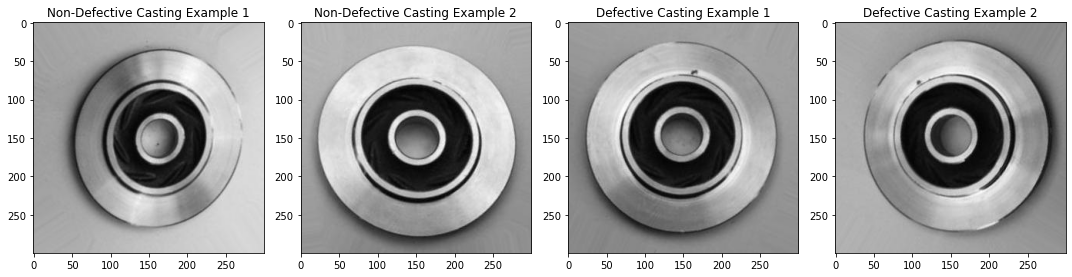

In [7]:
# visualize a few non-defective and defective cast images
ok_img_1 = Image.open(ok_front_images_train_list[0])
ok_img_2 = Image.open(ok_front_images_train_list[1])
def_img_1 = Image.open(def_front_images_train_list[0])
def_img_2 = Image.open(def_front_images_train_list[1])

f, axarr = plt.subplots(1,4, figsize=(15, 15)) 

axarr[0].imshow(ok_img_1)
axarr[1].imshow(ok_img_2)
axarr[2].imshow(def_img_1)
axarr[3].imshow(def_img_2)

# f.suptitle("Casting Image Visualizations")
axarr[0].set_title("Non-Defective Casting Example 1")
axarr[1].set_title("Non-Defective Casting Example 2")
axarr[2].set_title("Defective Casting Example 1")
axarr[3].set_title("Defective Casting Example 2")

f.tight_layout()
plt.show()

Here, we visualize a few non-defective and defective casting images. These images show that the average person would not be able to distinguish if a casting is defective or not. Workers with specialized knowledge would perform better, but later, we will do image classification to increase defect detection accuracy using convolutional neural networks.

### 2.2 Data Augmentation and Train-Test Split Using StratifiedShuffleSplit

Here, we use `StratifiedShuffleSplit` to do cross-validation on the dataset and `ImageDataGenerator` from Keras to augment the training dataset for each split.

In [8]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

keras.__version__

'2.3.0-tf'

In [9]:
# initialize image data generator for later use

def get_datagen():
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=5, # used, Int. Degree range for random rotations.
        width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
        height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True, # you can do a horizontal flip
        vertical_flip=True, # you can also do a vertical flip
        rescale=None
    )
    return datagen

Number of casting products in dataset that are non-defective (0): 3137
Number of casting products in dataset that are defective (1): 4211


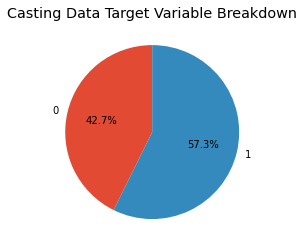

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

values, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=values, startangle=90, autopct = '%1.1f%%')

print("Number of casting products in dataset that are non-defective (0):", counts[0])
print("Number of casting products in dataset that are defective (1):", counts[1])

plt.title("Casting Data Target Variable Breakdown")
plt.show()

#### As we can see, there is a relatively even distribution of the two classes (defective and non-defective) in the dataset. The class is relatively balanced.

Looking at the results above, we can see that we have a relatively large dataset and a relatively balanced distribution of data. A normal 80/20 train/test split would technically work since our dataset is large, we want to implement cross-validation to 1) make sure that our results are robust across different data samples, and 2) ensure that each data sample is a good representative of the entire dataset.

StratifiedShuffleSplit is a method of cross-validation that achieves both of these via stratification and dataset shuffling / splitting. Since StratifiedShuffleSplit preserves the ratio of each class sample, we can prevent one class from being over/under represented in any of the train/test set splits. The stratification will be useful with more real-world training data as well, where there will may be more class imbalance than in the current dataset, since technology may improve so that defects are less common.

TO DO: BEEF UP SECTION HERE

In [201]:
%%time

# create and save cross-val splits and augmented data for each split

from sklearn.model_selection import StratifiedShuffleSplit
n_splits = 5

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=4)

splits = []

for train_index, test_index in sss.split(X, y):
    X_train = X[train_index].copy()
    y_train = y[train_index].copy()
    
    datagen = get_datagen()
    datagen.fit(X_train)
    
    # augment the training dataset by 20% by getting first batch
    X_new, y_new = datagen.flow(X_train, y_train, batch_size=int(len(X_train) / 5)).next()
    X_train_augmented = np.concatenate((X_train, X_new))
    y_train_augmented = np.concatenate((y_train, y_new))
    
    splits.append((X_train_augmented, X[test_index], y_train_augmented, y[test_index]))

CPU times: user 7.48 s, sys: 4.37 s, total: 11.8 s
Wall time: 13.2 s


## 3. Modeling

Use sigmoid activation with binary_crossentropy loss and one output unit instead of softmax with two output units
- https://stats.stackexchange.com/questions/207049/neural-network-for-binary-classification-use-1-or-2-output-neurons

In [225]:
# needed imports

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

from tensorflow.keras.layers import Add, Input
from tensorflow.keras.layers import average, concatenate

from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics as mt
import seaborn as sns

In [21]:
# helper function that plots training recall history, validation recall history, 
# training BCE loss history, and validation BCE loss history

from matplotlib import pyplot as plt

%matplotlib inline

def plot_history(model_history):
    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(list(model_history.history.values())[1])

    plt.ylabel('Recall')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(list(model_history.history.values())[3])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(model_history.history['loss'])
    plt.ylabel('BCE Loss')
    plt.xlabel('epochs')

    plt.subplot(2,2,4)
    plt.plot(model_history.history['val_loss'])
    plt.xlabel('epochs')
    
    plt.show()

In [54]:
# helper function that plots recall confusion matrix and average score for a given model

def plot_recall_cm(X_test, y_test, model, model_avg_score, model_name):
    yhat_proba = model.predict(X_test)
    yhat = np.round(yhat_proba)

    cm = mt.confusion_matrix(y_test, yhat)
    cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True)
    plt.title(model_name + ": " + str(model_avg_score))
    plt.show()

### 3.1 MLP

In [23]:
# function using Sequential API that generates a basic MLP model with 7 fully-connected dense layers

def create_mlp(X_train):
    mlp = Sequential()
    mlp.add(Flatten()) # make images flat for the MLP input
    mlp.add(Dense(input_dim=X_train.shape[3], units=256, activation='relu'))
    mlp.add(Dense(units=128, activation='relu'))
    mlp.add(Dense(units=64, activation='relu'))
    mlp.add(Dense(units=32, activation='relu'))
    mlp.add(Dense(units=16, activation='relu'))
    mlp.add(Dense(units=8, activation='relu'))
    mlp.add(Dense(1))
    mlp.add(Activation('sigmoid'))

    mlp.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=[keras.metrics.Recall()])
    
    return mlp

In [24]:
%%time

mlp_scores = []
mlp_models = []
mlp_histories = []

for X_train, X_test, y_train, y_test in splits:
    mlp_model = create_mlp(X_train)
    
    mlp_history = mlp_model.fit(X_train, y_train, 
                                epochs=20, shuffle=True, verbose=0, 
                                validation_data=(X_test, y_test),
                                callbacks=[EarlyStopping(monitor='val_loss', patience=4)])
    
    mlp_models.append(mlp_model)
    mlp_histories.append(mlp_history)
    
    scores = mlp_model.evaluate(X_test, y_test, verbose=1)
    mlp_scores.append(scores)

46/46 [==============================] - 0s 3ms/step - loss: 0.0589 - recall_4: 0.9751
CPU times: user 8min 2s, sys: 1min 10s, total: 9min 12s
Wall time: 2min 15s


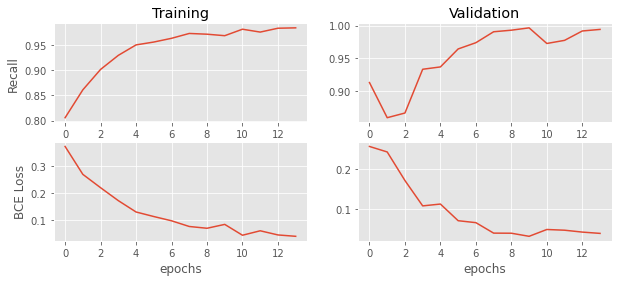

In [25]:
plot_history(mlp_histories[0])

MLP Average Recall:  0.9757719755172729


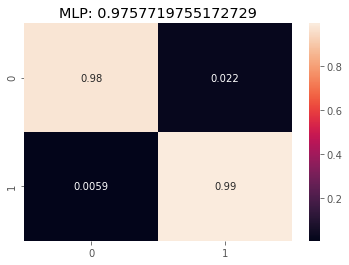

In [55]:
mlp_avg_score = np.mean([recall for [loss, recall] in mlp_scores])
print("MLP Average Recall: ", mlp_avg_score)

plot_recall_cm(splits[0][1], splits[0][3], mlp_models[0], mlp_avg_score, model_name="MLP")

In [71]:
# get global yhat probability values and yhat predictions

yhat_proba_mlp = []
yhat_mlp = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = mlp_models[idx]
    yhat_proba = model.predict(X_test)
    yhat = np.round(yhat_proba)

    yhat_proba_mlp.append(yhat_proba)
    yhat_mlp.append(yhat)
    
yhat_proba_mlp = np.array(yhat_proba_mlp).flatten()
yhat_mlp = np.array(yhat_mlp).flatten()

### 2.2 Convolutional Neural Networks

In [27]:
# function using Sequential API that generates a basic CNN model with 3x3 convolutional kernels and 2x2 max pooling
# can specify number of convolutional layers and number of filters

def create_cnn(X_train, num_conv_layers=1, num_filters=16):
    if num_conv_layers <= 0 or num_filters <= 0:
        raise Exception("num_conv_layers or num_filters cannot be zero")
        
    cnn = Sequential()
    
    cnn.add(Conv2D(filters=num_filters, 
                   kernel_size=(3, 3), 
                   padding='same',
                   activation='relu',
                   input_shape=X_train.shape[1:],
                   data_format="channels_last"))
    cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    
    for layer in range(num_conv_layers-1):
        cnn.add(Conv2D(filters=num_filters, 
                   kernel_size=(3, 3), 
                   padding='same',
                   activation='relu',
                   data_format="channels_last"))
        cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
        
    cnn.add(Flatten()) # add one layer on flattened output
    cnn.add(Dropout(0.25))
    cnn.add(Dense(256, activation="relu"))
    cnn.add(Dropout(0.25))
    cnn.add(Dense(1, activation="sigmoid"))    

    cnn.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=[keras.metrics.Recall()])

    return cnn

In [28]:
# function using Functional API that generates a 7-layer CNN model with 3x3 convolutional kernels and 2x2 max pooling
# as well as residual paths ala ResNet, which utilizes a "bypass layer"
# can specify number of filters

def create_cnn_with_residuals(X_train, num_filters):
    input_holder = Input(shape=X_train.shape[1:])
    
    x = Conv2D(filters=num_filters, 
               kernel_size=(3, 3), 
               padding='same', 
               activation='relu',
               data_format="channels_last")(input_holder)
    
    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)
    
    x = Conv2D(filters=num_filters, 
               kernel_size=(3, 3), 
               padding='same', 
               activation="relu", 
               data_format="channels_last")(x)   
    
    x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x) # split for start of residual bypass 
    
    x = Conv2D(filters=num_filters,
               kernel_size=(3,3),
               padding='same',
               activation='relu',
               data_format="channels_last")(x_split)
    
    x = Conv2D(filters=num_filters,
               kernel_size=(3,3),
               padding='same',
               activation='relu',
               data_format="channels_last")(x)
    
    x = Conv2D(filters=num_filters,
               kernel_size=(3,3),
               padding='same',
               activation='relu',
               data_format="channels_last")(x)
    
    # add back split layer / residual
    x = Add()([x, x_split])
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)
    
    x = Flatten()(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.25)(x)
    x = Dense(1, activation="sigmoid")(x)
    
    resnet = Model(inputs=input_holder, outputs=x)
    resnet.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=[keras.metrics.Recall()])

    return resnet

### 2.2.1 CNN #1 - 7 layers (5 CONV2D, 2 FC), 16 filters, 3x3 kernels, 2x2 max-pooling, Dense-Layer Dropout

In [31]:
%%time

cnn1_scores = []
cnn1_models = []
cnn1_histories = []

for X_train, X_test, y_train, y_test in splits:
    cnn1_model = create_cnn(X_train, num_conv_layers=5, num_filters=16)
    
    cnn1_history = cnn1_model.fit(X_train, y_train,
                                  epochs=20, shuffle=True, verbose=0, validation_data=(X_test, y_test),
                                  callbacks=[EarlyStopping(monitor='val_loss', patience=4)])
    
    cnn1_models.append(cnn1_model)
    cnn1_histories.append(cnn1_history)
    
    scores = cnn1_model.evaluate(X_test, y_test, verbose=1)
    cnn1_scores.append(scores)

46/46 [==============================] - 1s 25ms/step - loss: 0.0268 - recall_10: 0.9929
CPU times: user 1h 25min 49s, sys: 21min 30s, total: 1h 47min 19s
Wall time: 28min 48s


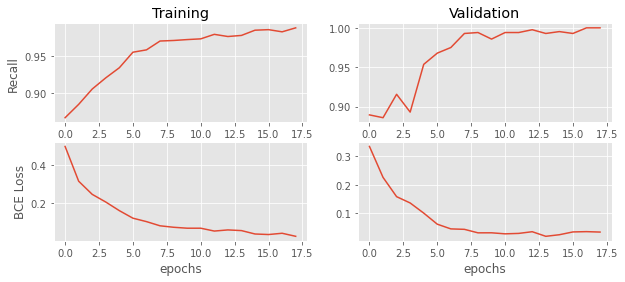

In [32]:
plot_history(cnn1_histories[0])

CNN 1 Average Recall:  0.9923990368843079


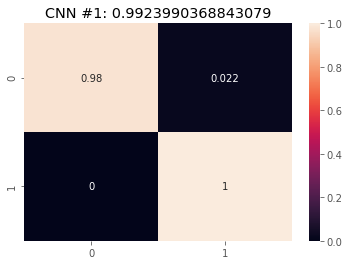

In [56]:
cnn1_avg_score = np.mean([recall for [loss, recall] in cnn1_scores])
print("CNN 1 Average Recall: ", cnn1_avg_score)

plot_recall_cm(splits[0][1], splits[0][3], cnn1_models[0], cnn1_avg_score, model_name="CNN #1")

In [70]:
# get global yhat probability values and yhat predictions

yhat_proba_cnn1 = []
yhat_cnn1 = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = cnn1_models[idx]
    yhat_proba = model.predict(X_test)
    yhat = np.round(yhat_proba)

    yhat_proba_cnn1.append(yhat_proba)
    yhat_cnn1.append(yhat)
    
yhat_proba_cnn1 = np.array(yhat_proba_cnn1).flatten()
yhat_cnn1 = np.array(yhat_cnn1).flatten()

### 2.2.2 CNN #2 - 7 layers (5 CONV2D, 2 FC), 32 filters, 3x3 kernels, 2x2 max-pooling, Dense-Layer Dropout

In [88]:
%%time

cnn2_scores = []
cnn2_models = []
cnn2_histories = []

for X_train, X_test, y_train, y_test in splits:
    cnn2_model = create_cnn(X_train, num_conv_layers=5, num_filters=32)
    
    cnn2_history = cnn2_model.fit(X_train, y_train,
                                  epochs=20, shuffle=True, verbose=0, validation_data=(X_test, y_test),
                                  callbacks=[EarlyStopping(monitor='val_loss', patience=4)])
    
    cnn2_models.append(cnn2_model)
    cnn2_histories.append(cnn2_history)
    
    scores = cnn2_model.evaluate(X_test, y_test, verbose=1)
    cnn2_scores.append(scores)

46/46 [==============================] - 2s 39ms/step - loss: 0.0267 - recall_30: 0.9952
CPU times: user 3h 2s, sys: 57min 39s, total: 3h 57min 42s
Wall time: 1h 8min 32s


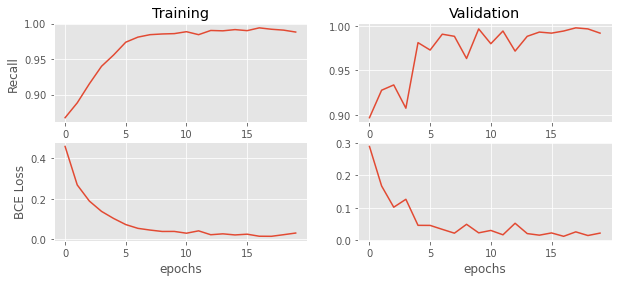

In [89]:
plot_history(cnn2_histories[0])

CNN 2 Average Recall:  0.9855106949806214


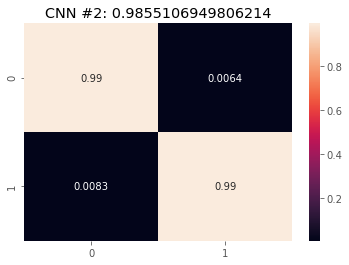

In [90]:
cnn2_avg_score = np.mean([recall for [loss, recall] in cnn2_scores])
print("CNN 2 Average Recall: ", cnn2_avg_score)

plot_recall_cm(splits[0][1], splits[0][3], cnn2_models[0], cnn2_avg_score, model_name="CNN #2")

In [91]:
# get global yhat probability values and yhat predictions

yhat_proba_cnn2 = []
yhat_cnn2 = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = cnn2_models[idx]
    yhat_proba = model.predict(X_test)
    yhat = np.round(yhat_proba)

    yhat_proba_cnn2.append(yhat_proba)
    yhat_cnn2.append(yhat)
    
yhat_proba_cnn2 = np.array(yhat_proba_cnn2).flatten()
yhat_cnn2 = np.array(yhat_cnn2).flatten()

### 2.2.3 CNN #3 - 7 layers (5 CONV2D, 2 FC), 16 filters, 3x3 kernels, 2x2 max-pooling, Dense-Layer Dropout, Residual Bypass Layer

In [37]:
%%time

cnn3_scores = []
cnn3_models = []
cnn3_histories = []

for X_train, X_test, y_train, y_test in splits:
    cnn3_model = create_cnn_with_residuals(X_train, num_filters=16)
    
    cnn3_history = cnn3_model.fit(X_train, y_train, batch_size=32, 
                                  epochs=20, shuffle=True, verbose=0, validation_data=(X_test, y_test),
                                  callbacks=[EarlyStopping(monitor='val_loss', patience=4)])
    
    cnn3_models.append(cnn3_model)
    cnn3_histories.append(cnn3_history)
    
    scores = cnn3_model.evaluate(X_test, y_test, verbose=1)
    cnn3_scores.append(scores)

46/46 [==============================] - 1s 24ms/step - loss: 0.0201 - recall_20: 0.9857
CPU times: user 1h 35min 31s, sys: 56min 20s, total: 2h 31min 52s
Wall time: 29min 34s


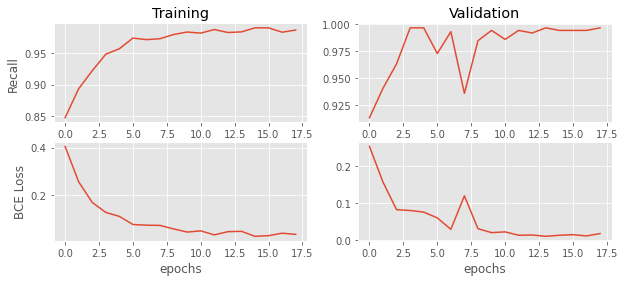

In [38]:
plot_history(cnn3_histories[0])

CNN 3 Average Recall:  0.9888361096382141


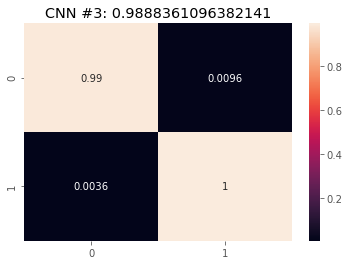

In [58]:
cnn3_avg_score = np.mean([recall for [loss, recall] in cnn3_scores])
print("CNN 3 Average Recall: ", cnn3_avg_score)

plot_recall_cm(splits[0][1], splits[0][3], cnn3_models[0], cnn3_avg_score, model_name="CNN #3")

In [68]:
# get global yhat probability values and yhat predictions

yhat_proba_cnn3 = []
yhat_cnn3 = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = cnn3_models[idx]
    yhat_proba = model.predict(X_test)
    yhat = np.round(yhat_proba)

    yhat_proba_cnn3.append(yhat_proba)
    yhat_cnn3.append(yhat)
    
yhat_proba_cnn3 = np.array(yhat_proba_cnn3).flatten()
yhat_cnn3 = np.array(yhat_cnn3).flatten()

### 2.2.4 CNN #4 - 7 layers (5 CONV2D, 2 FC), 32 filters, 3x3 kernels, 2x2 max-pooling, Dense-Layer Dropout, Residual Bypass Layer

In [40]:
%%time

cnn4_scores = []
cnn4_models = []
cnn4_histories = []

for X_train, X_test, y_train, y_test in splits:
    cnn4_model = create_cnn_with_residuals(X_train, num_filters=32)
    
    cnn4_history = cnn4_model.fit(X_train, y_train, batch_size=32, 
                                  epochs=20, shuffle=True, verbose=0, validation_data=(X_test, y_test),
                                  callbacks=[EarlyStopping(monitor='val_loss', patience=4)])
    
    cnn4_models.append(cnn4_model)
    cnn4_histories.append(cnn4_history)
    
    scores = cnn4_model.evaluate(X_test, y_test, verbose=1)
    cnn4_scores.append(scores)

46/46 [==============================] - 2s 41ms/step - loss: 0.0166 - recall_25: 0.9929
CPU times: user 3h 17min 18s, sys: 1h 48min 30s, total: 5h 5min 48s
Wall time: 58min 17s


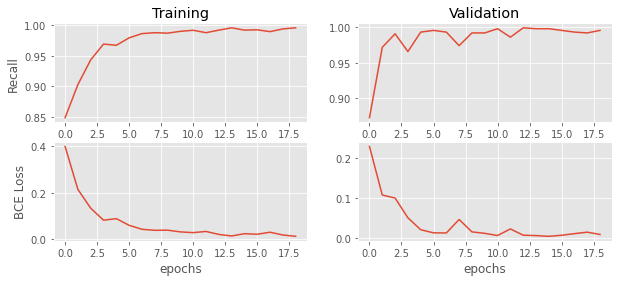

In [41]:
plot_history(cnn4_histories[0])

CNN 4 Average Recall:  0.9945368051528931


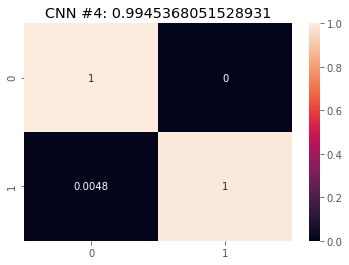

In [42]:
cnn4_avg_score = np.mean([recall for [loss, recall] in cnn4_scores])
print("CNN 4 Average Recall: ", cnn4_avg_score)

plot_recall_cm(splits[0][1], splits[0][3], cnn4_models[0], cnn4_avg_score, model_name="CNN #4")

In [67]:
# get global yhat probability values and yhat predictions

yhat_proba_cnn4 = []
yhat_cnn4 = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model = cnn4_models[idx]
    yhat_proba = model.predict(X_test)
    yhat = np.round(yhat_proba)

    yhat_proba_cnn4.append(yhat_proba)
    yhat_cnn4.append(yhat)
    
yhat_proba_cnn4 = np.array(yhat_proba_cnn4).flatten()
yhat_cnn4 = np.array(yhat_cnn4).flatten()

### 2.3 Compare CNN Architectures

Visually, we can compare our four different convolutional neural network models using recall confusion matrices on the same split across the four architectures. Here, we use the first split.

In [92]:
# get global y_test values across all splits

y_tests = []

for X_train, X_test, y_train, y_test in splits:
    y_tests.append(y_test)
    
y_tests = np.array(y_tests).flatten()

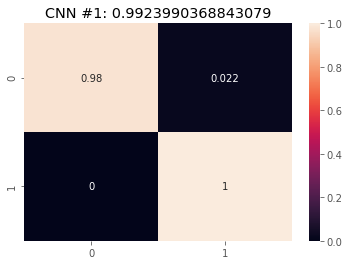

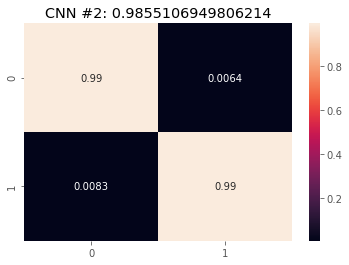

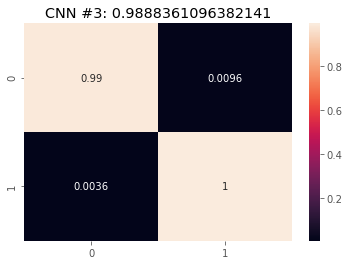

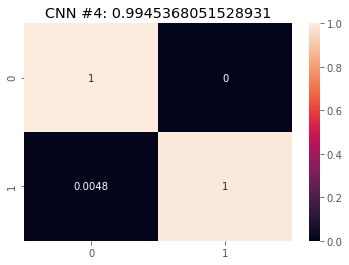

In [93]:
# plot all confusion matrices together for first split

plot_recall_cm(splits[0][1], splits[0][3], cnn1_models[0], cnn1_avg_score, model_name="CNN #1")
plot_recall_cm(splits[0][1], splits[0][3], cnn2_models[0], cnn2_avg_score, model_name="CNN #2")
plot_recall_cm(splits[0][1], splits[0][3], cnn3_models[0], cnn3_avg_score, model_name="CNN #3")
plot_recall_cm(splits[0][1], splits[0][3], cnn4_models[0], cnn4_avg_score, model_name="CNN #4")

Quantitatively, we can compare our four different convolutional neural network models using the McNemar's statistical significance test. McNemar's test is a statistical signifiance test that can be used to compare the performance of different machine learning models. The test is "recommended in those cases where the algorithms being compared can only be evaluated once" [[ref]](https://machinelearningmastery.com/mcnemars-test-for-machine-learning/). We use this test to determine whether one model's performance is significantly different from another model's performance by calculating a contingency table and comparing the calculated `pvalue` to a specified `alpha`.

Reference: https://en.wikipedia.org/wiki/McNemar%27s_test

In [94]:
def calculate_contingency_table(cl1_array, cl2_array):
    table = np.zeros((2, 2))
    
    # [[both correct, cl1 correct and cl2 wrong]
    # [cl2 correct and cl1 wrong, both cl1 and cl2 wrong]]
    
    for r1, r2 in zip(cl1_array, cl2_array):
        if r1 and r2:
            table[0][0] += 1
        elif r1 and not r2:
            table[0][1] += 1
        elif not r1 and r2:
            table[1][0] += 1
        else:
            table[1][1] += 1
            
    return table

In [95]:
# save y_test value and calculate all possible contingency tables

cl1_correct = y_tests == yhat_cnn1
cl2_correct = y_tests == yhat_cnn2
cl3_correct = y_tests == yhat_cnn3
cl4_correct = y_tests == yhat_cnn4

cl1_cl2_ct = calculate_contingency_table(cl1_correct, cl2_correct)
cl1_cl3_ct = calculate_contingency_table(cl1_correct, cl3_correct)
cl1_cl4_ct = calculate_contingency_table(cl1_correct, cl4_correct)
cl2_cl3_ct = calculate_contingency_table(cl2_correct, cl3_correct)
cl2_cl4_ct = calculate_contingency_table(cl2_correct, cl4_correct)
cl3_cl4_ct = calculate_contingency_table(cl3_correct, cl4_correct)

In [96]:
from statsmodels.stats.contingency_tables import mcnemar

alpha = 0.05

# code adapted from https://machinelearningmastery.com/mcnemars-test-for-machine-learning/
def mcnemar_test(table):
    # calculate mcnemar test from contingency table and print out statistical results
    result = mcnemar(table, exact=True)
    print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))

    # interpret the p-value
    if result.pvalue > alpha:
        print('Same proportions of errors (fail to reject H0)')
    else:
        print('Different proportions of errors (reject H0)')
        
    print()

In [97]:
print("CNN #1 and CNN #2:")
mcnemar_test(cl1_cl2_ct)

print("CNN #1 and CNN #3:")
mcnemar_test(cl1_cl3_ct)

print("CNN #1 and CNN #4:")
mcnemar_test(cl1_cl4_ct)

print("CNN #2 and CNN #3:")
mcnemar_test(cl2_cl3_ct)

print("CNN #2 and CNN #4:")
mcnemar_test(cl2_cl4_ct)

print("CNN #3 and CNN #4:")
mcnemar_test(cl3_cl4_ct)

CNN #1 and CNN #2:
statistic=33.000, p-value=0.015
Different proportions of errors (reject H0)

CNN #1 and CNN #3:
statistic=31.000, p-value=0.004
Different proportions of errors (reject H0)

CNN #1 and CNN #4:
statistic=11.000, p-value=0.000
Different proportions of errors (reject H0)

CNN #2 and CNN #3:
statistic=55.000, p-value=0.779
Same proportions of errors (fail to reject H0)

CNN #2 and CNN #4:
statistic=8.000, p-value=0.000
Different proportions of errors (reject H0)

CNN #3 and CNN #4:
statistic=8.000, p-value=0.000
Different proportions of errors (reject H0)



The McNemar test demonstrates that the four different CNN architectures are **NOT** statistically different from one another - we fail to reject the null hypothesis, as our `pvalue` is greater than the `alpha` of 0.05. Though the architectures have different recall scores across each split and different average recall scores across all splits, the test demonstrates that all the tests perform similarly well, despite CNN #3 having the highest average recall score.

### 2.4 Compare CNN with MLP

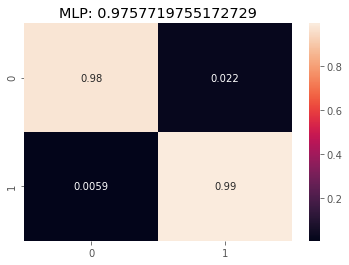

In [98]:
plot_recall_cm(splits[0][1], splits[0][3], mlp_models[0], mlp_avg_score, model_name="MLP")

In [99]:
# Compute ROC curve and ROC-AUC score for each class
# Code / References: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_curve, roc_auc_score

fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_tests, yhat_proba_mlp)
auc_mlp = roc_auc_score(y_tests, yhat_proba_mlp)

fpr_cnn1, tpr_cnn1, thresholds_cnn1 = roc_curve(y_tests, yhat_proba_cnn1)
auc_cnn1 = roc_auc_score(y_tests, yhat_proba_cnn1)

fpr_cnn2, tpr_cnn2, thresholds_cnn2 = roc_curve(y_tests, yhat_proba_cnn2)
auc_cnn2 = roc_auc_score(y_tests, yhat_proba_cnn2)

fpr_cnn3, tpr_cnn3, thresholds_cnn3 = roc_curve(y_tests, yhat_proba_cnn3)
auc_cnn3 = roc_auc_score(y_tests, yhat_proba_cnn3)

fpr_cnn4, tpr_cnn4, thresholds_cnn4 = roc_curve(y_tests, yhat_proba_cnn4)
auc_cnn4 = roc_auc_score(y_tests, yhat_proba_cnn4)

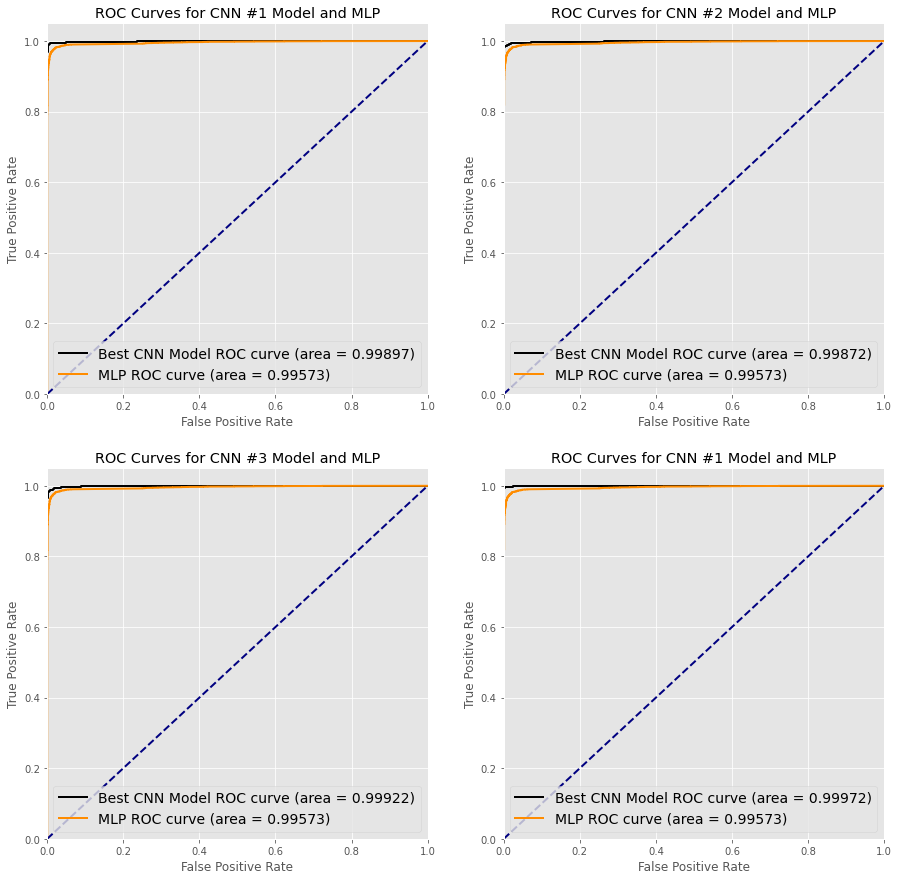

In [100]:
# plot ROC curves for best CNN model and MLP model

plt.figure(figsize=(15,15))
lw = 2

# first subplot / CNN
plt.subplot(2,2,1)
plt.plot(fpr_cnn1, tpr_cnn1, color='black', lw=lw, 
         label='Best CNN Model ROC curve (area = %0.5f)' % auc_cnn1)
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=lw, 
         label='MLP ROC curve (area = %0.5f)' % auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CNN #1 Model and MLP')
plt.legend(loc="lower right", prop={'size': 14})

# second subplot / CNN
plt.subplot(2,2,2)
plt.plot(fpr_cnn2, tpr_cnn2, color='black', lw=lw, 
         label='Best CNN Model ROC curve (area = %0.5f)' % auc_cnn2)
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=lw, 
         label='MLP ROC curve (area = %0.5f)' % auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CNN #2 Model and MLP')
plt.legend(loc="lower right", prop={'size': 14})

# third subplot / CNN
plt.subplot(2,2,3)
plt.plot(fpr_cnn3, tpr_cnn3, color='black', lw=lw, 
         label='Best CNN Model ROC curve (area = %0.5f)' % auc_cnn3)
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=lw, 
         label='MLP ROC curve (area = %0.5f)' % auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CNN #3 Model and MLP')
plt.legend(loc="lower right", prop={'size': 14})

# fourth subplot / CNN
plt.subplot(2,2,4)
plt.plot(fpr_cnn4, tpr_cnn4, color='black', lw=lw, 
         label='Best CNN Model ROC curve (area = %0.5f)' % auc_cnn4)
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=lw, 
         label='MLP ROC curve (area = %0.5f)' % auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CNN #1 Model and MLP')
plt.legend(loc="lower right", prop={'size': 14})

plt.show()

In [101]:
# save y_test value and calculate all possible contingency tables

mlp_correct = y_tests == yhat_mlp

cl1_mlp_ct = calculate_contingency_table(cl1_correct, mlp_correct)
cl2_mlp_ct = calculate_contingency_table(cl2_correct, mlp_correct)
cl3_mlp_ct = calculate_contingency_table(cl3_correct, mlp_correct)
cl4_mlp_ct = calculate_contingency_table(cl4_correct, mlp_correct)

In [102]:
print("CNN #1 and MLP:")
mcnemar_test(cl1_mlp_ct)

print("CNN #2 and MLP:")
mcnemar_test(cl2_mlp_ct)

print("CNN #3 and MLP:")
mcnemar_test(cl3_mlp_ct)

print("CNN #4 and MLP:")
mcnemar_test(cl4_mlp_ct)

CNN #1 and MLP:
statistic=36.000, p-value=0.000
Different proportions of errors (reject H0)

CNN #2 and MLP:
statistic=58.000, p-value=0.000
Different proportions of errors (reject H0)

CNN #3 and MLP:
statistic=58.000, p-value=0.000
Different proportions of errors (reject H0)

CNN #4 and MLP:
statistic=14.000, p-value=0.000
Different proportions of errors (reject H0)



In [ ]:
# write something here about mlp vs all the others

## 3. Exceptional Work - ResNet Transfer Learning

In [240]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

In [254]:
# expand grayscale image data to 3 channels so preprocess_input will work

splits_expanded = []

for X_train, X_test, y_train, y_test in splits:
    X_train_expanded = []
    X_test_expanded = []

    for x in range(len(X_train)):
        expanded = np.dstack((X_train[x], X_train[x], X_train[x]))
        X_train_expanded.append(expanded)

    for x in range(len(X_test)):
        expanded = np.dstack((X_test[x], X_test[x], X_test[x]))
        X_test_expanded.append(expanded)

    X_train_expanded = np.asarray(X_train_expanded)
    X_test_expanded = np.asarray(X_test_expanded)
    
    splits_expanded.append((X_train_expanded.copy(), X_test_expanded.copy(), y_train.copy(), y_test.copy()))

In [255]:
splits[0][0]

array([[[[ 0.3       ],
         [ 0.30392157],
         [ 0.30784314],
         ...,
         [ 0.15490196],
         [ 0.15490196],
         [ 0.16666667]],

        [[ 0.30392157],
         [ 0.30392157],
         [ 0.30392157],
         ...,
         [ 0.15098039],
         [ 0.16666667],
         [ 0.1627451 ]],

        [[ 0.30784314],
         [ 0.30784314],
         [ 0.30392157],
         ...,
         [ 0.1627451 ],
         [ 0.1627451 ],
         [ 0.15882353]],

        ...,

        [[ 0.39019608],
         [ 0.40196078],
         [ 0.40588235],
         ...,
         [ 0.26078431],
         [ 0.26078431],
         [ 0.25686275]],

        [[ 0.40196078],
         [ 0.40588235],
         [ 0.39411765],
         ...,
         [ 0.26470588],
         [ 0.26078431],
         [ 0.25686275]],

        [[ 0.40588235],
         [ 0.40588235],
         [ 0.39411765],
         ...,
         [ 0.26078431],
         [ 0.26470588],
         [ 0.26078431]]],


       [[[ 0.29607843],


In [248]:
splits_expanded_copy = splits_expanded.copy()

In [249]:
# confirm that channels = 3 instead of = 1

print(splits_expanded[0][0].shape)
print(splits_expanded[0][1].shape)

(7053, 100, 100, 3)
(1470, 100, 100, 3)


In [250]:
# define VGG model

vgg_no_top = VGG19(weights='imagenet', include_top=False)
vgg_no_top.trainable = False

In [251]:
# preprocess input for VGG network

X_train = preprocess_input(splits_expanded[0][0])
X_test = preprocess_input(splits_expanded[0][1])

In [253]:
splits_expanded_copy[0][0]

array([[[[-123.38      , -116.479     , -103.639     ],
         [-123.37607843, -116.47507843, -103.63507843],
         [-123.37215686, -116.47115686, -103.63115686],
         ...,
         [-123.52509804, -116.62409804, -103.78409804],
         [-123.52509804, -116.62409804, -103.78409804],
         [-123.51333333, -116.61233333, -103.77233333]],

        [[-123.37607843, -116.47507843, -103.63507843],
         [-123.37607843, -116.47507843, -103.63507843],
         [-123.37607843, -116.47507843, -103.63507843],
         ...,
         [-123.52901961, -116.62801961, -103.78801961],
         [-123.51333333, -116.61233333, -103.77233333],
         [-123.5172549 , -116.6162549 , -103.7762549 ]],

        [[-123.37215686, -116.47115686, -103.63115686],
         [-123.37215686, -116.47115686, -103.63115686],
         [-123.37607843, -116.47507843, -103.63507843],
         ...,
         [-123.5172549 , -116.6162549 , -103.7762549 ],
         [-123.5172549 , -116.6162549 , -103.7762549 ],
  

In [245]:
X_train

array([[[[-103.639     , -116.479     , -123.38      ],
         [-103.63507843, -116.47507843, -123.37607843],
         [-103.63115686, -116.47115686, -123.37215686],
         ...,
         [-103.78409804, -116.62409804, -123.52509804],
         [-103.78409804, -116.62409804, -123.52509804],
         [-103.77233333, -116.61233333, -123.51333333]],

        [[-103.63507843, -116.47507843, -123.37607843],
         [-103.63507843, -116.47507843, -123.37607843],
         [-103.63507843, -116.47507843, -123.37607843],
         ...,
         [-103.78801961, -116.62801961, -123.52901961],
         [-103.77233333, -116.61233333, -123.51333333],
         [-103.7762549 , -116.6162549 , -123.5172549 ]],

        [[-103.63115686, -116.47115686, -123.37215686],
         [-103.63115686, -116.47115686, -123.37215686],
         [-103.63507843, -116.47507843, -123.37607843],
         ...,
         [-103.7762549 , -116.6162549 , -123.5172549 ],
         [-103.7762549 , -116.6162549 , -123.5172549 ],
  

In [219]:
x_train_resnet = vgg_no_top.predict(splits_expanded[0][0])
x_test_resnet = vgg_no_top.predict(splits_expanded[0][1])

In [211]:
x_train_resnet[0].shape

(3, 3, 512)

In [256]:
# let's add a fully-connected layer
inputs = Input(shape=(IMAGE_NEW_SIZE, IMAGE_NEW_SIZE, 3))
x = vgg_no_top(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs, outputs)

model.summary()

# x = Flatten()(input_x)
# x = Dropout(0.25)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.25)(x)
# predictions = Dense(1, activation='sigmoid')(x)

# model = Model(inputs=input_x, outputs=predictions)

# model.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
vgg19 (Model)                multiple                  20024384  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 513       
Total params: 20,024,897
Trainable params: 513
Non-trainable params: 20,024,384
_________________________________________________________________


In [257]:
y_train_resnet = splits_expanded[0][2]
y_test_resnet = splits_expanded[0][3]

In [261]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(splits_expanded[0][0], y_train_resnet, epochs=20,
          batch_size=32, verbose=1,
          validation_data=(splits_expanded[0][1], y_test_resnet))

Epoch 1/20
 15/221 [=>............................] - ETA: 3:04 - loss: 0.7132 - accuracy: 0.4792

KeyboardInterrupt: 

In [183]:
x_test_resnet.shape

(1470, 3, 3, 512)

In [ ]:
## questions
# can i do data augmentation on entire X data or just X_train values
# only one split question? about 8000 images
# how many folds / shuffle splits needed? => I don't want to decrease the number of epics

# https://stackoverflow.com/questions/59496936/how-to-use-tensorflow-addons-metrics-correctly-in-functional-api

# positive class and negative class ==> class weights
# biased to care about the positive examples
# loss_weights => instead of using tf.keras.losses()
# false negatives vs. false positive
# f1 would have treated them exactly

In [ ]:
# beef up eric's part (SPLIT PART ESPECIALLY - LOOK AT RUBRIC)
# run overnight
# write up statistical significance results after running overnight
# write up how micro / macro averaging not needed for binary classification problem